In [292]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\sinem\\Desktop'

In [293]:
data=pd.read_excel('dt.xlsx')

In [294]:
data.info()
len(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


136

In [295]:
data.replace("?", np.nan, inplace=True)
data.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [301]:
data = data.drop(columns=['ind_420', 'ind_422', '90_target','20_target'])

KeyError: "['ind_420' 'ind_422' '90_target' '20_target'] not found in axis"

In [304]:
data=data.dropna()
data.isnull().sum().sort_values(ascending=False)

50_target    0
ind_62       0
ind_43       0
ind_44       0
ind_45       0
            ..
ind_243      0
ind_309      0
ind_310      0
ind_311      0
ind_5        0
Length: 132, dtype: int64

In [298]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
data.describe().T


count       mean        std         min        25%        50%  \
ind_5      6167.0  -0.803146  23.624403 -131.000000 -14.000000   0.000000   
ind_6      6167.0  -0.803470  23.624144 -131.000000 -14.000000   0.000000   
ind_8      6167.0  48.388890  36.388526    0.000000  14.285714  50.000000   
ind_9      6167.0  48.289282  36.478009    0.000000  14.285714  50.000000   
ind_10     6167.0   0.099609  60.414625 -100.000000 -50.000000   0.000000   
...           ...        ...        ...         ...        ...        ...   
ind_418    6167.0 -28.166694  23.271524 -188.000000 -39.000000 -22.000000   
ind_424    6167.0   0.490297   0.425376    0.000000   0.000000   0.473684   
ind_426    6167.0   0.498188   0.228547    0.000000   0.323783   0.495192   
ind_428    6167.0   0.490174   0.150483    0.083530   0.379894   0.487078   
50_target  6167.0  -2.906358  34.559778  -37.142889 -36.208094 -34.267756   

                 75%         max  
ind_5      13.000000   76.000000  
ind_6      13.000000   76.000000  
ind_8      85.714286  100.000000  
ind_9      85.714286  100.000000  
ind_10     57.142857  100.000000  
...              ...         ...  
ind_418   -11.000000    0.000000  
ind_424     1.000000    1.000000  
ind_426     0.675730    1.000000  
ind_428     0.601508    0.868534  
50_target  35.879524   37.038694  

[131 rows x 8 columns]

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 134 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(1)
memory usage: 6.4+ MB


In [42]:
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [43]:
#Correlation with output variable
cor_target = abs(cor["50_target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features


ind_16       0.101774
ind_17       0.121097
ind_18       0.127057
ind_324      0.110802
ind_332      0.104057
ind_412      0.127234
ind_418      0.101488
50_target    1.000000
Name: 50_target, dtype: float64

In [171]:
df_corr = df.filter(["ind_16", "ind_17", "ind_18", "ind_324", "ind_332",  "ind_412", "ind_418", "50_target"], axis=1)

# REGRESSION

In [264]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm 
import seaborn as sns

In [307]:
#I choose 50_target as my response. 
from sklearn.preprocessing import LabelEncoder   
dummy = pd.get_dummies(data["ind_109"])
df_dummy = pd.concat([df, dummy],axis=1)
df_dummy = df_dummy.drop(["ind_109"], axis=1)
df_dummy.head()
df = df_dummy

KeyError: "['ind_109'] not found in axis"

C:\Users\sinem\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6917874813079834, 0.0)

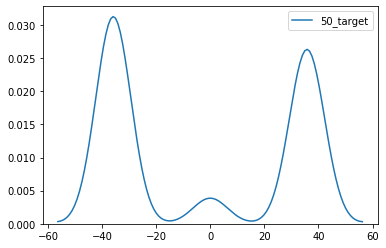

In [182]:
sns.kdeplot(data["50_target"]) #has tree peaks,
stats.shapiro(data["50_target"]) #it is not normally distributed

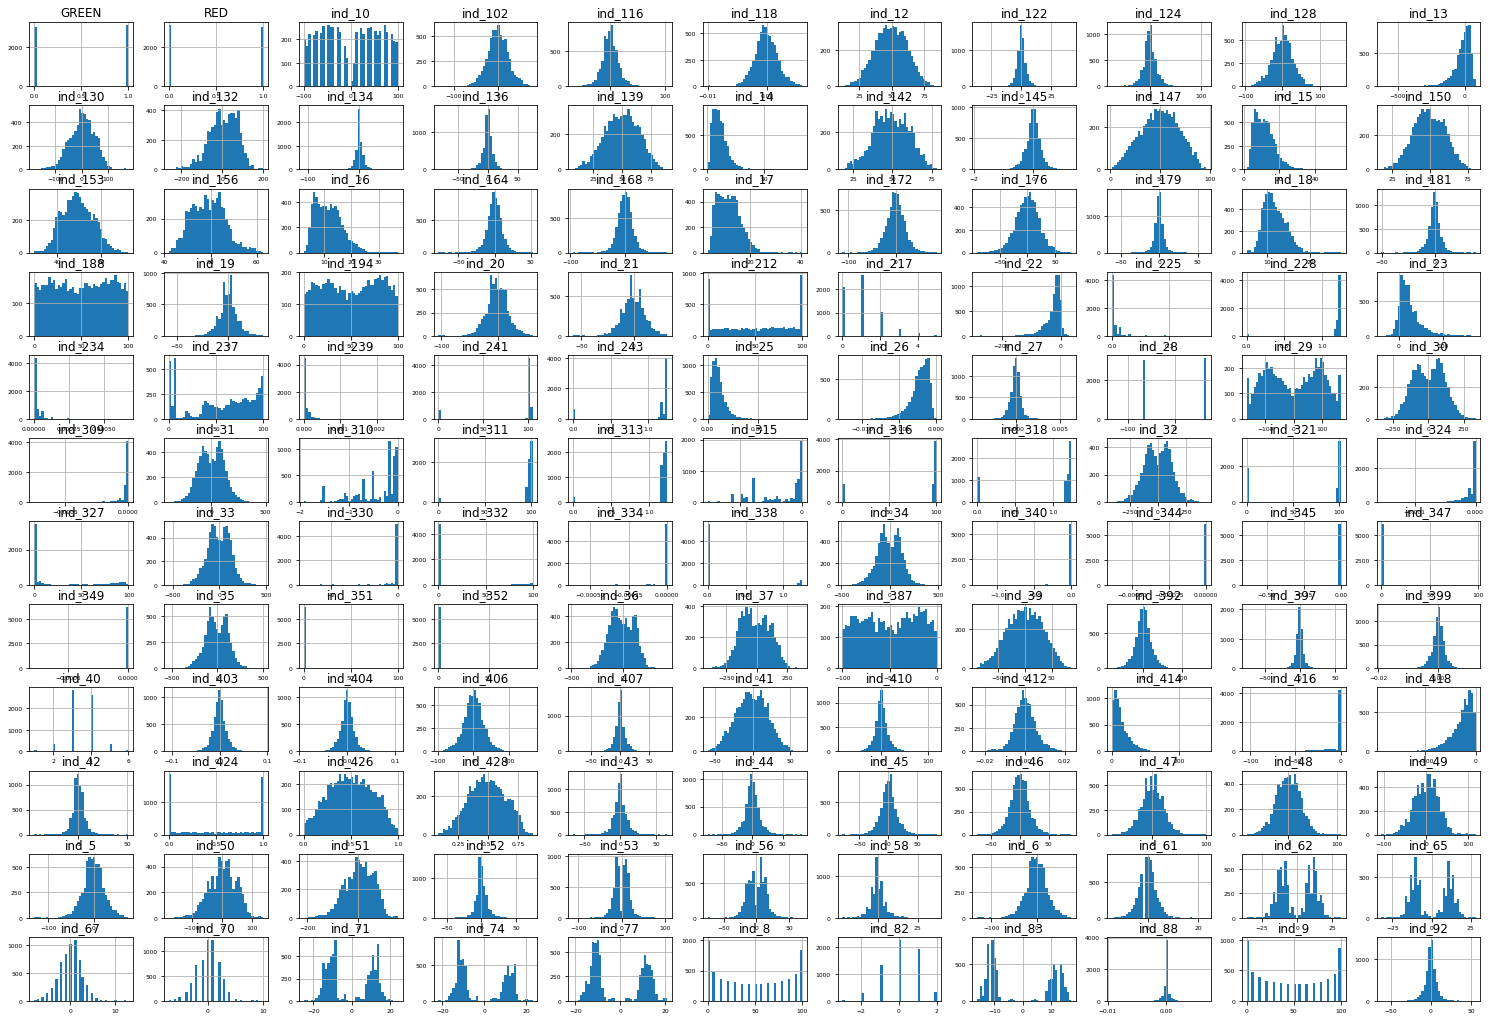

In [183]:

data_df = df.drop(["50_target"], axis=1)
data_df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

In [308]:
#Loading the dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("50_target",1)
X=sm.add_constant(X)    #Feature Matrix
Y = df["50_target"]          #Target Variable
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, shuffle=False)


In [309]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4625, 133), (4625,), (1542, 133), (1542,))

In [310]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     7.761
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          1.87e-120
Time:                        15:19:59   Log-Likelihood:                -22477.
No. Observations:                4625   AIC:                         4.522e+04
Df Residuals:                    4493   BIC:                         4.607e+04
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7633      0.468     -5.909      0.000      -3.680      -1.846
x1            29.0565     20.498      1.418      0.156     -11.130      69.243
x2             9.1147     16.714      0.545      0.586     -23.653      41.882
x3         -1.333e+10    4.9e+09     -2.721      0.007   -2.29e+10   -3.73e+09
x4          1.337e+10   4.91e+09      2.721      0.007    3.74e+09     2.3e+10
x5          2.214e+10   8.14e+09      2.721      0.007    6.19e+09    3.81e+10
x6            21.4768     25.322      0.848      0.396     -28.168      71.121
x7             0.3695      1.727      0.214      0.831      -3.016       3.755
x8             0.5959      1.199      0.497      0.619      -1.755       2.947
x9            -1.4159      1.455     -0.973      0.331      -4.269       1.437
x10            0.0419      1.854      0.023      0.982      -3.594       3.677
x11            2.8793      1.762      1.634      0.102      -0.576       6.335
x12            4.0958      0.770      5.318      0.000       2.586       5.606
x13           16.8578     11.901      1.416      0.157      -6.475      40.191
x14          -19.7037     20.466     -0.963      0.336     -59.827      20.420
x15           11.6860     14.004      0.834      0.404     -15.769      39.141
x16           -6.8083      9.128     -0.746      0.456     -24.703      11.087
x17           -5.4484      8.172     -0.667      0.505     -21.470      10.573
x18          244.1184   1443.569      0.169      0.866   -2585.987    3074.224
x19          231.6893   1367.683      0.169      0.865   -2449.643    2913.021
x20         -215.2251   1255.589     -0.171      0.864   -2676.797    2246.346
x21           -0.7173      0.782     -0.917      0.359      -2.251       0.816
x22           -1.6791      1.725     -0.973      0.330      -5.061       1.703
x23           -2.0669      2.263     -0.913      0.361      -6.504       2.371
x24            5.5690      3.266      1.705      0.088      -0.833      11.971
x25           -6.6156      3.196     -2.070      0.038     -12.881      -0.350
x26            7.4082      3.103      2.388      0.017       1.325      13.491
x27           -4.6023      3.512     -1.311      0.190     -11.487       2.282
x28           -3.3423      2.839     -1.177      0.239      -8.907       2.223
x29           -0.3731      2.074     -0.180      0.857      -4.438       3.692
x30           10.6912      2.090      5.115      0.000       6.593      14.789
x31           -1.9749      2.750     -0.718      0.473      -7.366       3.416
x32           -0.9893      0.986     -1.003      0.316      -2.922       0.944
x33            1.8689      1.592      1.174      0.241      -1.253       4.991
x34            2.8859      2.452      1.177      0.239      -1.921       7.693
x35            4.6057      2.331      1.976      0.048       0.036       9.175
x3

In [312]:
#Loading the dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_corr = df_corr.drop("50_target",1)
X_corr=sm.add_constant(x_corr)    #Feature Matrix
y_corr = df_corr["50_target"]          #Target Variable
X_train_corr, X_test_corr , y_train_corr , y_test_corr = train_test_split(X_corr, y_corr , test_size = 0.25 , random_state = 42)


In [313]:
import statsmodels.api as sm
# Note the difference in argument order
model2 = sm.OLS(y_train_corr, X_train_corr).fit()
predictions = model2.predict(X_train_corr) # make the predictions by the model
# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     35.51
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.25e-48
Time:                        15:20:49   Log-Likelihood:                -22827.
No. Observations:                4625   AIC:                         4.567e+04
Df Residuals:                    4617   BIC:                         4.572e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.5137      2.251    -10.001      0.000     -26.927     -18.100
ind_16        -0.1115      0.263     -0.423      0.672      -0.628       0.405
ind_17         0.7775      0.318      2.442      0.015       0.153       1.402
ind_18         0.8980      0.230      3.899      0.000       0.446       1.350
ind_324    -1.111e+04   4167.252     -2.665      0.008   -1.93e+04   -2936.563
ind_332        0.1019      0.016      6.361      0.000       0.070       0.133
ind_412      819.8492     98.421      8.330      0.000     626.897    1012.801
ind_418        0.0492      0.027      1.809      0.071      -0.004       0.102
==============================================================================
Omnibus:                    20176.177   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.849
Skew:                           0.132   Prob(JB):                    5.48e-126
Kurtosis:                       1.290   Cond. No.                     3.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
influence = model.get_influence()
influence

In [94]:
resid_student = influence.resid_studentized_external

In [96]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)


Leverage vs studentized residuals


# PRINCIAPLE COMPONENT ANALYSIS


In [99]:
df2=data.copy()
df2 = df2.drop(columns=['20_target', '90_target', ])
dummy = pd.get_dummies(data["ind_109"])
df2_dummy = pd.concat([df2, dummy],axis=1)
df2_dummy = df2_dummy.drop(["ind_109"], axis=1)
df2_dummy.head()
df2 = df2_dummy
y=df2["50_target"]
X=df2.drop(['50_target'], axis=1)

#Splitting data into test and train
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [110]:
explained_variance = pca.explained_variance_ratio_
np.cumsum(np.round(explained_variance, decimals=4)*100)[0:15]

array([37.07, 49.59, 55.78, 60.27, 63.42, 66.22, 68.93, 70.78, 72.5 ,
       74.18, 75.65, 77.04, 78.35, 79.56, 80.76])

In [109]:
features=range(pca.n_components_)
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

([<matplotlib.axis.XTick at 0x199a6484948>,
 <a list of 132 Text xticklabel objects>)

In [112]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [113]:
import statsmodels.api as sm
lm = sm.OLS(y_train, np.asarray(X_train))
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              13.09
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    6.89e-33
Time:                        17:58:11   Log-Likelihood:                         -22868.
No. Observations:                4625   AIC:                                  4.577e+04
Df Residuals:                    4610   BIC:                                  4.586e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3324      0.072     -4.617      0.000      -0.473      -0.191
x2             0.4132      0.124      3.337      0.001       0.170       0.656
x3             0.8929      0.176      5.067      0.000       0.547       1.238
x4             1.0773      0.207      5.208      0.000       0.672       1.483
x5             0.4047      0.247      1.638      0.101      -0.080       0.889
x6            -0.7675      0.262     -2.928      0.003      -1.281      -0.254
x7            -0.2501      0.266     -0.940      0.347      -0.772       0.272
x8            -0.4277      0.322     -1.327      0.185      -1.060       0.204
x9             0.6865      0.334      2.054      0.040       0.031       1.342
x10           -1.6998      0.338     -5.022      0.000      -2.363      -1.036
x11            0.9726      0.361      2.694      0.007       0.265       1.681
x12           -1.2187      0.372     -3.276      0.001      -1.948      -0.489
x13           -0.9158      0.382     -2.395      0.017      -1.665      -0.166
x14            2.0153      0.398      5.057      0.000       1.234       2.796
x15            1.7147      0.399      4.294      0.000       0.932       2.498
==============================================================================
Omnibus:                    19259.617   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.351
Skew:                           0.133   Prob(JB):                    1.30e-132
Kurtosis:                       1.245   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# DECISION TREE

In [269]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [314]:
cart_model = DecisionTreeRegressor()
?cart_model
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

TAHMIN

In [349]:
cart_model.predict(X_test)[0:5]

array([6.56709174, 6.56709174, 6.56709174, 6.56709174, 6.56709174])

In [350]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

35.62611120855172

In [351]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

(((0.09923194953143326 if x[94] <= -7.885000286478316e-06 else 
    17.698661948293598) if x[92] <= 101.08311462402344 else 
    6.567091744901317 if x[97] <= 1.1900572776794434 else 
    -22.25661833059846) if x[93] <= 1.238378882408142 else (
    -12.341496111823357 if x[29] <= -5.861234188079834 else 
    11.071855729268297) if x[98] <= -1.5405622124671936 else 
    -31.126086759896218 if x[86] <= 3.5 else 3.9946059857142866)



MODEL TUNING

In [355]:
cart_grdi = {"criterion" : ['mse', 'friedman_mse'],
           "min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}
cart_cv = GridSearchCV(cart_model, cart_grdi, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1914 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 2804 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 3858 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7988 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.9min finished


In [356]:
print("En iyi parametlerler: " + str(cart_cv_model.best_params_))

En iyi parametlerler: {'criterion': 'friedman_mse', 'max_leaf_nodes': 4, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [358]:
cart = tree.DecisionTreeRegressor(criterion='friedman_mse',max_leaf_nodes=4,min_samples_leaf=20,min_samples_split=10)
cart_model = cart.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

35.54036877403024

In [359]:
plt.figure(figsize=(15,20))
tree.plot_tree(cart_model);

# RANDOM FOREST

In [362]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

TAHMIN

In [363]:
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

35.71523340119281

TUNING

In [378]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7,10,15,25],
              "n_estimators": [100,200,500,1000]}
rfr_model = RandomForestRegressor(random_state=0)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 14.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [376]:
rfr_cv_model.best_params_

{'max_depth': 4, 'max_features': 3, 'n_estimators': 200}

In [224]:
rfr_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=15,
                                  n_estimators=100)
rfr_tuned.fit(X_train, y_train)
y_pred = rfr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

33.60585583956255

In [374]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh")

ValueError: Shape of passed values is (15, 1), indices imply (133, 1)

# NEURAL NETWORK

In [366]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [216]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [217]:
mlp_model.n_layers_

4

In [218]:
mlp_model.hidden_layer_sizes

(100, 20)

TAHMIN

In [219]:
y_pred = mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

30.495902763464148

MODEL TUNING

In [220]:
'''
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}
'''

mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 24.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activatio

In [226]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [227]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [228]:
y_pred = mlp_tuned.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

26.410074807395965